<div style="display: flex; align-items: center; justify-content: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/f/fb/Escudo-UdeA.svg" width="150" style="margin-right: 20px;">
    <div>

# **Trabajo N° 4 - Estadistica y análisis exploratorio**

### Cristhian Ocampo Bolivar
### Maria Isabel Duque Buitrago
### Leidy Estefanía Silva Torres

Utilizando su base de datos del trabajo # 3 realizar:

1) Identificación de las observaciones atípicas (outliers), Puntos de balanceo, Observaciones influenciales. Analice si debe eliminarlas en el contexto dado.

2) Tenga en cuanta la multicolinealidad del trabajo 3. Explique.

3) Seleccione el mejor modelo manualmente. Explique.

4) Realice la validación de los supuestos de los residuales del modelo seleccionado.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

$Y$: Riesgo de infección. Probabilidad promedio estimada de adquirir infección en el hospital (en porcentaje).

$X1$: Duración de la estadía. Duración promedio de la estadía de todos los pacientes en el hospital (en días).

$X2$: Rutina de cultivos. Razón del número de cultivos realizados en pacientes sin síntomas de infección hospitalaria, por cada 100.

$X3$: Número de camas. Número promedio de camas en el hospital durante el periodo del estudio

$X4$: Censo promedio diario. Número promedio de pacientes en el hospital por día durante el periodo del estudio.

$X5$: Número de enfermeras. Número promedio de enfermeras, equivalentes a tiempo completo, durante el periodo
del estudio.

In [ ]:
df = pd.read_csv("/content/DatosTrabajo3EAE20251.txt", delimiter=" ")
df.head()

,Y,X1,X2,X3,X4,X5
0,3.1,9.41,59.5,20.6,91.7,29
1,4.1,10.47,53.2,5.7,69.1,196
2,3.2,8.19,52.1,10.8,59.2,176
3,7.7,12.78,56.8,46.0,116.9,322
4,7.8,12.07,43.7,52.4,105.3,157


In [ ]:
x = df[['X1','X2','X3','X4','X5']].values
y = df['Y']

X = sm.add_constant(x)
modelo = sm.OLS(y, X)
resultados = modelo.fit()
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     12.95
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           7.46e-09
Time:                        01:40:42   Log-Likelihood:                -105.00
No. Observations:                  74   AIC:                             222.0
Df Residuals:                      68   BIC:                             235.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3199      1.606      0.199      0.8

**1.A Identificación de observaciones atipicas**

In [ ]:
import numpy as np
import statsmodels.api as sm

X = sm.add_constant(X)

modelo = sm.OLS(y, X)
resultados = modelo.fit()
residuos = resultados.resid
mse_resid = resultados.mse_resid
print("MSE de los residuos:", mse_resid)
desv = np.sqrt(mse_resid)
residuos_estand = residuos / desv


print("Residuos estandarizados:\n", residuos_estand)

MSE de los residuos: 1.0883103438001405
Residuos estandarizados:
 0    -1.038698
1     0.158615
2    -0.278752
3     0.845871
4     1.171372
        ...   
69    0.161171
70    0.897874
71    0.991978
72    0.395517
73   -1.924949
Length: 74, dtype: float64


In [ ]:
# Residuos Estudiantizados
residuos_estudiantizados_int = resultados.get_influence().resid_studentized_internal
print(residuos_estudiantizados_int)

[-1.0779967   0.16240984 -0.28382917  0.91864467  1.3234921  -0.79673329
 -0.70534474 -0.81106574 -1.5106596  -0.89045849 -0.80286735 -1.59798385
  2.13720066 -0.70349987 -1.60348637  0.54772151 -1.32200682 -0.28719513
 -0.36353776 -0.19569984 -1.43904246  1.29495748  1.43384558 -0.39237153
 -0.16733821 -1.43902964  0.11426962  0.57777811  2.21479282 -0.20026564
 -1.79668355  1.7117355  -0.74173403  0.80659421  2.01870873  0.15118981
  0.91511231  0.41610849 -1.89642008  1.19161613 -1.20485352  0.39795855
 -0.75309687 -0.0212961   0.09163183  0.39734726  1.37393148  0.40321216
  0.7366901  -0.56275356 -0.11559934  0.98114363 -0.71228552  1.81984021
  0.61814175 -0.45601672 -0.36024991  0.34630332  0.40061144 -0.12791782
 -0.58519657 -0.41914202  0.36457652 -0.08877919 -1.30777296  0.18682656
 -0.6453699   0.54282185  0.9662325   0.16430744  0.90984582  1.00955631
  0.40633057 -2.32689632]


In [ ]:
# Residuos Estudiantizados
residuos_estudiantizados_ext = resultados.get_influence().resid_studentized_external
print(residuos_estudiantizados_ext)

[-1.07930294  0.16124251 -0.28190149  0.91757644  1.33097887 -0.79457063
 -0.70271454 -0.80900257 -1.52532417 -0.88908555 -0.80074637 -1.6168389
  2.19647983 -0.70086306 -1.62262473  0.5448825  -1.32944576 -0.28524863
 -0.36120597 -0.19431027 -1.45068209  1.30154908  1.44527953 -0.38991741
 -0.16613744 -1.45066876  0.11343719  0.57492696  2.28230716 -0.19884629
 -1.82732409  1.73693587 -0.73925653  0.8044992   2.06669469  0.15009923
  0.91400411  0.4135644  -1.93426915  1.19536824 -1.20893535  0.39548236
 -0.75067595 -0.02113901  0.09096119  0.39487345  1.38312459  0.4007157
  0.73418887 -0.55990566 -0.11475747  0.98087021 -0.70968116  1.85207337
  0.61531094 -0.45334495 -0.35793293  0.34405106  0.39812495 -0.12698905
 -0.58234594 -0.41658716  0.36224008 -0.0881291  -1.31476045  0.18549536
 -0.64257789  0.53998693  0.9657541   0.16312721  0.90867898  1.00970102
  0.40382232 -2.40756147]


In [ ]:
# Indices de valores atipos con un umbral de 3 con Residuos Estandarizados
umbral = 3
atipicos = np.where(abs(residuos_estand) > umbral)[0]
print("Índices de valores atípicos:", atipicos)

Índices de valores atípicos: []


In [ ]:
# Indices de valores atipos con un umbral de 3 con Residuos Estudiantizados
umbral = 3
atipicos = np.where(abs(residuos_estudiantizados_int) > umbral)[0]
print("Índices de valores atípicos:", atipicos)

Índices de valores atípicos: []


In [ ]:
# Indices de valores atipos con un umbral de 3 con Residuos Estudiantizados
umbral = 3
atipicos = np.where(abs(residuos_estudiantizados_ext) > umbral)[0]
print("Índices de valores atípicos:", atipicos)

Índices de valores atípicos: []


A partir del calculo de residuos estandarizados y residuos estudiantizados se establece que no existen observaciones atípicas para el umbral dado.

**1.B Identificación de puntos de balanceo**

In [ ]:
h_i = resultados.get_influence().hat_matrix_diag

n = X.shape[0]
k = X.shape[1] -1
umbral = 2 * (k + 1) / n

puntos_balanceo = np.where(h_i > umbral)[0]

print("Puntos de balanceo (índices):", puntos_balanceo)


Puntos de balanceo (índices): [ 4  9 14 18 25 48 49 73]


**1.C Identificación de Influenciales**

In [ ]:
X = sm.add_constant(x)
modelo = sm.OLS(y, X)
resultados = modelo.fit()
influencia = resultados.get_influence()
distancia_cook = influencia.cooks_distance[0]
print("Distancia de Cook:", distancia_cook)
umbral = 1
atipicos = np.where(abs(distancia_cook) > umbral)[0]
print("Índices de valores atípicos:", atipicos)

Distancia de Cook: [1.49326242e-02 2.12870878e-04 4.93517269e-04 2.52426014e-02
 8.07486486e-02 8.37003069e-03 6.36728513e-03 6.35784301e-03
 2.73805139e-02 1.03995270e-01 7.66082064e-03 3.71776004e-02
 1.36467288e-02 9.10845900e-03 9.78334672e-02 4.65891808e-03
 1.28094937e-02 5.40993220e-04 4.85084374e-03 1.42151676e-04
 1.87447129e-02 2.16490460e-02 2.28527078e-02 1.76691827e-03
 6.34802238e-04 7.77712975e-02 1.48952595e-04 2.22768643e-03
 9.17277372e-02 3.41108060e-04 3.92497874e-02 1.80445730e-02
 4.57233837e-03 5.82583163e-03 2.62589881e-02 3.08517742e-04
 1.43611782e-02 3.31072912e-03 3.80276107e-02 1.13380872e-02
 1.82393359e-02 1.37831966e-03 1.23359812e-02 1.28680210e-05
 1.14652854e-04 9.12570281e-04 2.93622860e-02 1.57498116e-03
 2.61611518e-02 1.26525215e-02 9.76497276e-05 8.19416142e-03
 7.21766952e-03 4.74604193e-02 7.26536029e-03 1.36262394e-03
 4.82512584e-04 3.29012039e-03 7.03043941e-04 1.26747117e-04
 3.45008535e-03 1.95191078e-03 5.43746611e-04 4.66130408e-05
 1.32

In [ ]:
dffits = resultados.get_influence().dffits[0]
print("DFFITS:", dffits)
umbral_dffits = 2 * np.sqrt((k + 1) / n)
observaciones_influyentes = np.where(np.abs(dffits) > umbral_dffits)[0]
print("Observaciones influyentes (índices):", observaciones_influyentes)

DFFITS: [-0.29968818  0.03548142 -0.05404645  0.38872044  0.69999198 -0.22349031
 -0.19472884 -0.19481588 -0.40925308 -0.78870082 -0.21382794 -0.47787099
  0.29408429 -0.23289879 -0.77530425  0.16632641 -0.27879086 -0.05658718
 -0.16950779 -0.02899726 -0.33807547  0.36224304  0.37324494 -0.10231964
 -0.06127273 -0.68862664  0.02967729  0.11504142  0.76448145 -0.04491927
 -0.49355808  0.33388435 -0.16507898  0.18647693  0.40636592  0.04271414
  0.2931868   0.14007932 -0.48720025  0.26164405 -0.33193188  0.09037324
 -0.27118404 -0.008722    0.02603621  0.07353541  0.42253899  0.09660866
  0.39484534 -0.27413266 -0.02402906  0.22166996 -0.20734009  0.54308316
  0.20783121 -0.08989006 -0.05345985  0.1395879   0.06454505 -0.02737662
 -0.14317587 -0.10755987  0.05675207 -0.01660112 -0.28367039  0.048232
 -0.11250861  0.13644857  0.13872516  0.03233762  0.14888155  0.19092524
  0.0950713  -1.63505122]
Observaciones influyentes (índices): [ 4  9 14 25 28 73]


Se realiza la eliminación de los puntos de balanceo hayados para evaluar su impacto en R^2 y R^2 ajustado:

In [ ]:
indices_a_eliminar = [4, 9, 14, 18, 25, 48, 49, 73]
df_filtrado = df.drop(indices_a_eliminar)

x = df_filtrado[['X1','X2','X3','X4','X5']].values
y = df_filtrado['Y']

X = sm.add_constant(x)
modelopb = sm.OLS(y, X)
resultadospb = modelopb.fit()
print(resultadospb.summary())



                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     12.22
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           3.50e-08
Time:                        01:40:43   Log-Likelihood:                -90.089
No. Observations:                  66   AIC:                             192.2
Df Residuals:                      60   BIC:                             205.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4333      2.067      0.693      0.4

Se realiza la eliminación de los puntos influyentes hayados para evaluar su impacto en los coeficientes.

In [ ]:
indices_a_eliminar = [4, 9, 14, 25, 28, 73]

df_filtrado = df.drop(indices_a_eliminar)

x = df_filtrado[['X1','X2','X3','X4','X5']].values
y = df_filtrado['Y']

X = sm.add_constant(x)
modeloinf = sm.OLS(y, X)
resultadosinf = modeloinf.fit()
print(resultadosinf.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     12.63
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           1.81e-08
Time:                        01:40:43   Log-Likelihood:                -90.507
No. Observations:                  68   AIC:                             193.0
Df Residuals:                      62   BIC:                             206.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1627      1.668      0.697      0.4

Se calcula en MSE para los tres modelos realizados:

- Modelo_original: Incluye todas las variables y todas las observaciones.
- Modelo_pb: Incluye todas las variables y se eliminan todas las observaciones correspondientes a puntos de balanceo.
- Modelo_inf: Incluye todas las variables y se elimina todas las observaciones correspondientes a puntos influyentes.

In [ ]:
mse_modelo_original = resultados.mse_resid
print("MSE del modelo original:", mse_modelo_original)

mse_modelo_pb = resultadospb.mse_resid
print("MSE del modelo con puntos de balanceo eliminados:", mse_modelo_pb)

mse_modelo_inf = resultadosinf.mse_resid
print("MSE del modelo con observaciones influyentes eliminadas:", mse_modelo_inf)


MSE del modelo original: 1.0883103438001405
MSE del modelo con puntos de balanceo eliminados: 0.9874823320484573
MSE del modelo con observaciones influyentes eliminadas: 0.9198735988987411


**Análisis**:

De acuerdo con los resultados obtenidos a partir de los modelos de ajuste lineal, al eliminar los puntos de balanceo y las observaciones influyentes, se  obteniene un menor MSE en el modelo. Sin embargo, al eliminar los puntos influyentes, se logra un modelo más ajustado, lo que facilita la realización de predicciones más precisas del riesgo de infección (Y).



**3. Seleccione el mejor modelo manualmente**



Calculo de R², R² ajustado, MSE y CP:

In [ ]:
from itertools import combinations
data = pd.DataFrame(df)
ols = smf.ols('Y~X1+X2+X3+X4+X5', data=data)
results = ols.fit()

def calcular_metricas_combinaciones(data, variable_dependiente, variables_independientes):

    resultados = []
    modelo_full = smf.ols(f"{variable_dependiente} ~ {' + '.join(variables_independientes)}", data=data).fit()
    mse_full = modelo_full.mse_resid

    # Generar todas las combinaciones posibles
    for k in range(1, len(variables_independientes) + 1):
        for combo in combinations(variables_independientes, k):
            formula = f"{variable_dependiente} ~ {' + '.join(combo)}"
            modelo = smf.ols(formula, data=data).fit()


            n = len(data)  # Número de observaciones
            p = len(combo) + 1  # Número de coeficientes

            sse_p = modelo.ssr  # Suma de cuadrados de los residuos (SSE)
            r2 = modelo.rsquared
            r2_ajustado = modelo.rsquared_adj
            mse_modelo = modelo.mse_resid  # MSE del modelo actual

            # Criterio de Mallows (Cp)
            cp = (sse_p / mse_full) - (n - (2 * p))

            resultados.append({
                'combinacion': ', '.join(combo),
                'n_variables': p - 1,  # Excluye el intercepto
                'r2': r2,
                'r2_ajustado': r2_ajustado,
                'mse': mse_modelo,
                'cp': cp
            })

    df_resultados = pd.DataFrame(resultados)
    df_resultados = df_resultados.sort_values(by='cp')

    return df_resultados


# Variables del modelo
variable_dependiente = 'Y'
variables_independientes = ['X1', 'X2', 'X3', 'X4','X5']

# Calcular métricas para todas las combinaciones
resultados = calcular_metricas_combinaciones(df, variable_dependiente, variables_independientes)

# Mostrar las 5 mejores combinaciones según Cp
print(resultados)

           combinacion  n_variables        r2  r2_ajustado       mse  \
19          X1, X3, X5            3  0.482472     0.460292  1.067982   
28      X1, X3, X4, X5            4  0.487683     0.457983  1.072551   
26      X1, X2, X3, X5            4  0.482475     0.452474  1.083453   
30  X1, X2, X3, X4, X5            5  0.487689     0.450019  1.088310   
6               X1, X3            2  0.438465     0.422648  1.142474   
15          X1, X2, X3            3  0.440675     0.416704  1.154235   
18          X1, X3, X4            3  0.440564     0.416589  1.154464   
25      X1, X2, X3, X4            4  0.442928     0.410634  1.166247   
24          X3, X4, X5            3  0.410084     0.384802  1.217363   
29      X2, X3, X4, X5            4  0.418318     0.384598  1.217767   
20          X1, X4, X5            3  0.397759     0.371949  1.242797   
27      X1, X2, X4, X5            4  0.410674     0.376510  1.233772   
22          X2, X3, X5            3  0.381352     0.354838  1.27

Se confirma que el modelo seleccionado manualmente coincide con el obtenido mediante el método de reducción de variables Backward.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error

X = df.drop(columns='Y')  # Variables independientes
y = df['Y']  # Variable dependiente

# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Usar la selección secuencial de características (Forward Selection en este caso)
sfs = SequentialFeatureSelector(model, n_features_to_select='auto', direction='backward', scoring='neg_mean_squared_error')

# Ajustar el modelo a todo el conjunto de datos
sfs.fit(X, y)

# Mostrar las características seleccionadas
selected_features = X.columns[sfs.get_support()]
print(f"Características seleccionadas: {selected_features}")

# Crear un nuevo conjunto de datos con las características seleccionadas
X_selected = X[selected_features]

# Ajustar el modelo de regresión lineal en las características seleccionadas
model.fit(X_selected, y)

# Predecir sobre el conjunto de datos utilizando las características seleccionadas
y_pred = model.predict(X_selected)

# Calcular el MSE en el conjunto de datos completo
mse = mean_squared_error(y, y_pred)
print(f"MSE del modelo con las características seleccionadas: {mse}")

Características seleccionadas: Index(['X1', 'X3', 'X5'], dtype='object')
MSE del modelo con las características seleccionadas: 1.0102535312254184


**Análisis**:

De acuerdo con los valores de R², R² ajustado, MSE y CP obtenidos, se selecciona el modelo compuesto por las variables X1, X3, X5 ya que presentan el mejor R² ajustado y el menor MSE y Cp. Además, a partir de la evaluación de multicolinealidad en el taller anterior se identifica que no hay problemas de multicolinealidad entre las variables.

**4. Realice la validación de los supuestos**

In [ ]:
x = df[['X1', 'X3' ,'X5']].values
y = df['Y']

X = sm.add_constant(x)

modelo = sm.OLS(y, X)
resultados = modelo.fit()

'1) Independencia:'

from statsmodels.stats.stattools import durbin_watson

# Calcular el estadístico de Durbin-Watson
dw = durbin_watson(resultados.resid)

# Imprimir el resultado del Durbin-Watson
print(f"Estadístico de Durbin-Watson: {dw}")

if dw < 1.5:
    print("Posible autocorrelación positiva (residuos correlacionados positivamente).")
elif dw > 2.5:
    print("Posible autocorrelación negativa (residuos correlacionados negativamente).")
else:
    print("No hay autocorrelación (los residuos son independientes).")

Estadístico de Durbin-Watson: 2.059315081937764
No hay autocorrelación (los residuos son independientes).


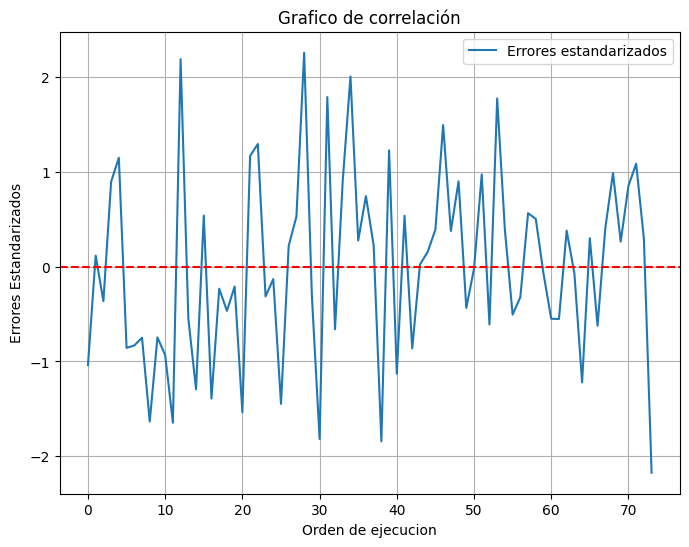

In [ ]:
# Grafico de correlación
Y_pred = resultados.predict(X)
errores = y - Y_pred
errores_estandarizados = (errores - np.mean(errores)) / np.std(errores)
plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(errores_estandarizados)), errores_estandarizados, label='Errores estandarizados')
plt.axhline(y=0, color='r', linestyle='--')  # Línea en y=0 para referencia
plt.title('Grafico de correlación')
plt.xlabel('Orden de ejecucion')
plt.ylabel('Errores Estandarizados')
plt.legend()
plt.grid(True)
plt.show()

Se concluye grafica y cuantitativamente que los datos cumplen con el supuesto de independiencia.

In [ ]:
'2) Normalidad:'

#Ho: Los residuos siguen una distribución normal
#Ha: Los residuos no siguen una distribucion normal

import scipy.stats as stats
stat, p_value = stats.shapiro(resultados.resid)

print("Estadística de Shapiro-Wilk:", stat)
print("Valor p de la prueba de Shapiro-Wilk:", p_value)

alpha = 0.05
if p_value <= alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Estadística de Shapiro-Wilk: 0.9904239584245513
Valor p de la prueba de Shapiro-Wilk: 0.8541784364447957
No podemos rechazar la hipótesis nula


<Figure size 800x600 with 0 Axes>

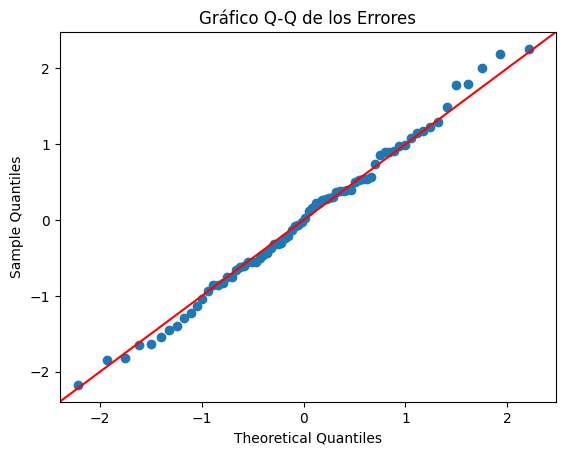

In [ ]:
# Grafico Q'Q
fig = plt.figure(figsize=(8, 6))
sm.qqplot(errores_estandarizados, line='45')
plt.title('Gráfico Q-Q de los Errores')
plt.show()

Se concluye grafica y cuantitativamente que los datos provienen de una distribución normal.

In [ ]:
'3) Varianza Constante'

from statsmodels.stats.diagnostic import het_breuschpagan

test_bpg = het_breuschpagan(resultados.resid, X)
print(f"Estadístico de Breusch-Pagan: {test_bpg[0]}")
print(f"P-valor de Breusch-Pagan: {test_bpg[1]}")

if test_bpg[1] <alpha:
    print("Hay evidencia de heterocedasticidad (varianza no constante).")
else:
    print("No hay evidencia de heterocedasticidad (varianza constante).")

Estadístico de Breusch-Pagan: 1.973749097821551
P-valor de Breusch-Pagan: 0.5778730160907568
No hay evidencia de heterocedasticidad (varianza constante).


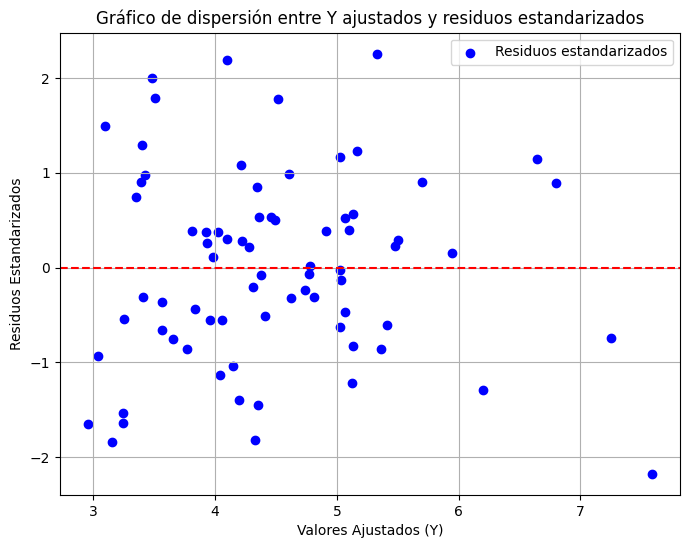

In [ ]:
'4) Linealidad'
Y_ajustados = resultados.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(Y_ajustados, errores_estandarizados, color='blue', label='Residuos estandarizados')
plt.axhline(0, color='red', linestyle='--')  # Línea en y=0 para referencia
plt.title('Gráfico de dispersión entre Y ajustados y residuos estandarizados')
plt.xlabel('Valores Ajustados (Y)')
plt.ylabel('Residuos Estandarizados')
plt.legend()
plt.grid(True)
plt.show()

Se validan los supuestos de linealidad y varianza constante de manera grafica y con la prueba Breusch-Pagan

**Análisis**:
A partir de la validación de supuestos se puede concluir que el modelo de regresión lineal seleccionado (Incluye X1, X3, X5) es apropiado y los resultados obtenidos son válidos ya que los residuos cumplen independencia, normalidad, varianza constante y linealidad.